In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

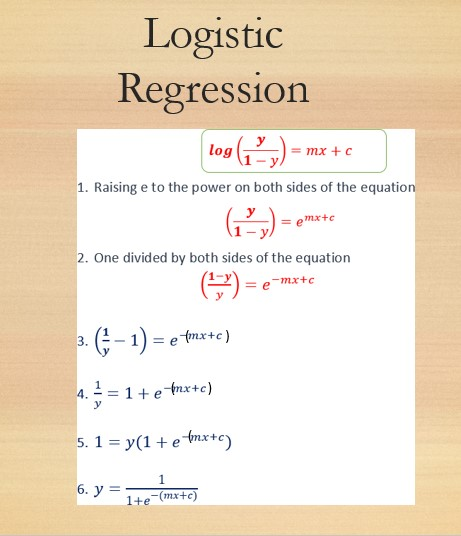

In [2]:
from IPython.display import Image
Image('Log.jpg')

In [84]:
df = pd.read_excel('shoe.xlsx')

In [85]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


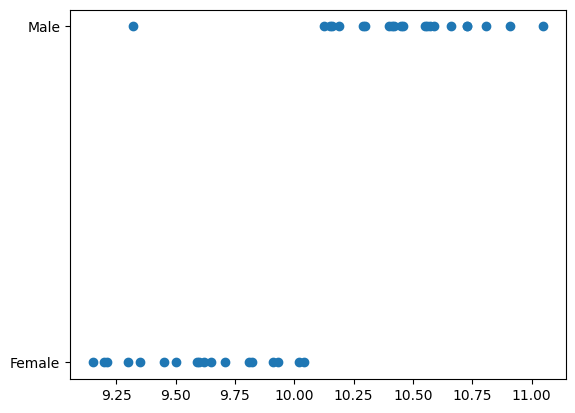

In [86]:
plt.scatter(df['size(cm)'],df['class(y)'])

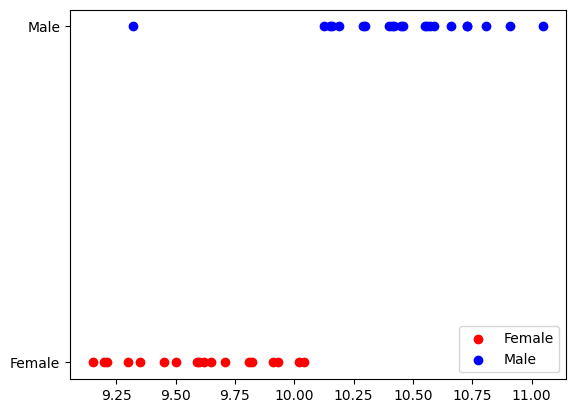

In [87]:
df0 = df[df['class(y)']=='Female']
df1 = df[df['class(y)']=='Male']
plt.scatter(df0['size(cm)'],df0['class(y)'],color='red',label='Female')
plt.scatter(df1['size(cm)'],df1['class(y)'],color='blue',label='Male')
plt.legend()

# Preprocessing

In [88]:
df1 = df.copy()

In [89]:
df1.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [90]:
df1['class(y)'] = df1['class(y)'].replace(['Male','Female'],[1,0])

In [91]:
df1.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [92]:
from sklearn.model_selection import train_test_split as tts

In [93]:
xtrain,xtest,ytrain,ytest = tts(df1[['size(cm)']],df1['class(y)'],test_size=0.3,random_state=55)

In [94]:
xtrain.head()

,size(cm)
31,9.91
25,10.46
36,9.21
14,10.55
16,10.02


In [95]:
ytrain.head()

31    0
25    1
36    0
14    1
16    0
Name: class(y), dtype: int64

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
reg = LogisticRegression()

In [98]:
reg.fit(xtrain,ytrain)

LogisticRegression()

In [99]:
m = reg.coef_

In [100]:
m

array([[2.10745564]])

In [101]:
c = reg.intercept_
c

array([-20.81422921])

In [102]:
pred = reg.predict(xtest)

In [103]:
reg.predict_proba(xtest)

array([[0.80622065, 0.19377935],
       [0.53496519, 0.46503481],
       [0.24519901, 0.75480099],
       [0.64167811, 0.35832189],
       [0.71069738, 0.28930262],
       [0.35975089, 0.64024911],
       [0.47182855, 0.52817145],
       [0.82215406, 0.17784594],
       [0.07776163, 0.92223837],
       [0.2299343 , 0.7700657 ],
       [0.61710592, 0.38289408],
       [0.29058102, 0.70941898]])

In [104]:
ytest.head()

22    0
3     0
2     1
38    0
6     0
Name: class(y), dtype: int64

In [105]:
Log_score = reg.score(xtest,ytest)

In [106]:
Log_score

0.9166666666666666

In [107]:
mae1 = mean_absolute_error(ytest,pred)

In [108]:
mae1

0.08333333333333333

In [109]:
mse1 = mean_squared_error(ytest,pred)
mse1

0.08333333333333333

In [110]:
data = {'Name':['Logistic_mae','Logistic_mse','Logistic accuracy'],
        'Accuracy':[mae1,mse1,Log_score]}
df_after_pred = pd.DataFrame(data=data)

In [111]:
df_after_pred.head()

,Name,Accuracy
0,Logistic_mae,0.083333
1,Logistic_mse,0.083333
2,Logistic accuracy,0.916667


In [112]:
import seaborn as sns

<Axes: xlabel='Accuracy', ylabel='Name'>

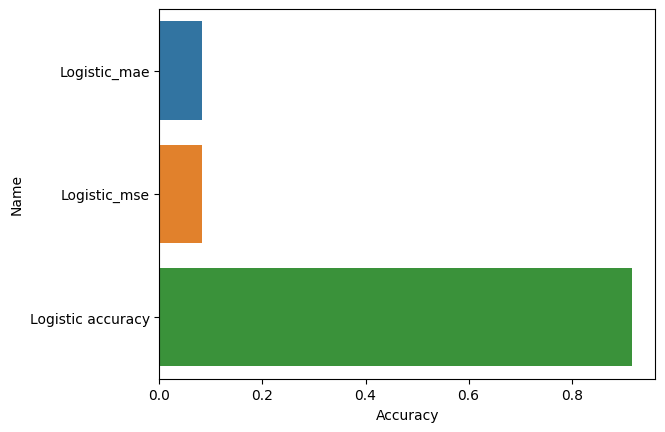

In [113]:
sns.barplot(x='Accuracy',y='Name',data=df_after_pred)

# Applying KNN

In [114]:
df2 = df.copy()

In [115]:
df2.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [116]:
df2['class(y)'] = df2['class(y)'].replace(['Male','Female'],[1,0])

In [117]:
df2.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [118]:
from sklearn.model_selection import train_test_split as tts

In [119]:
xtrain,xtest,ytrain,ytest=tts(df2[['size(cm)']],df2['class(y)'],test_size=0.3,random_state=45)

In [120]:
xtrain.head()

,size(cm)
10,9.82
28,10.45
36,9.21
24,9.62
33,9.59


In [121]:
ytrain.head()

10    0
28    1
36    0
24    0
33    0
Name: class(y), dtype: int64

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
ne = KNeighborsClassifier()

In [124]:
ne.fit(xtrain,ytrain)

KNeighborsClassifier()

In [125]:
pred = ne.predict(xtest)

In [126]:
pred

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [127]:
ne.predict_proba(xtest)

array([[1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.6, 0.4]])

In [128]:
ytest.head()

5     0
13    1
7     1
0     0
37    1
Name: class(y), dtype: int64

In [129]:
Log_score = ne.score(xtest,ytest)

In [130]:
Log_score

0.9166666666666666

In [131]:
mae2 = mean_absolute_error(ytest,pred)

In [132]:
mae2

0.08333333333333333

In [133]:
mse2 = mean_squared_error(ytest,pred)
mse2

0.08333333333333333

In [134]:
data = {'Name':['KNN_mae','KNN_mse','KNN_accuracy'],
        'Accuracy':[mae2,mse2,Log_score]}
df_after_pred2 = pd.DataFrame(data=data)

In [135]:
df_after_pred2.head()

,Name,Accuracy
0,KNN_mae,0.083333
1,KNN_mse,0.083333
2,KNN_accuracy,0.916667


In [136]:
import seaborn as sns

<Axes: xlabel='Accuracy', ylabel='Name'>

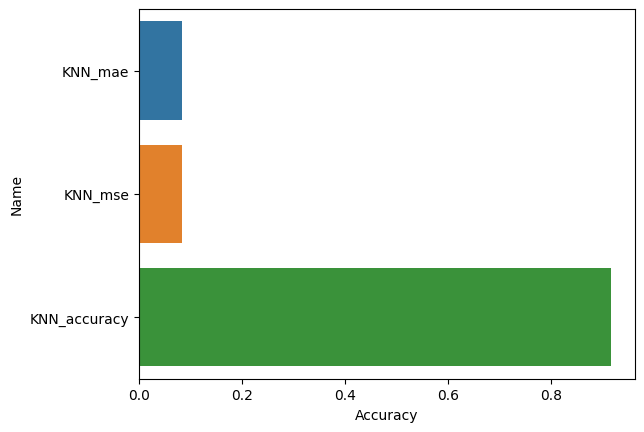

In [137]:
sns.barplot(x='Accuracy',y='Name',data=df_after_pred2)

# Applying Decision Tree

In [138]:
df3 = df.copy()

In [139]:
df3.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [140]:
df3['class(y)'] = df3['class(y)'].replace(['Male','Female'],[1,0])

In [141]:
df3.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [142]:
from sklearn.model_selection import train_test_split as tts

In [154]:
xtrain,xtest,ytrain,ytest=tts(df3[['size(cm)']],df3['class(y)'],test_size=0.3,random_state=45)

In [155]:
xtrain.head()

,size(cm)
10,9.82
28,10.45
36,9.21
24,9.62
33,9.59


In [178]:
ytrain.head()

10    0
28    1
36    0
24    0
33    0
Name: class(y), dtype: int64

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
de = DecisionTreeClassifier()

In [181]:
de.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [182]:
pred = de.predict(xtest)

In [183]:
pred

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [184]:
de.predict_proba(xtest)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [185]:
ytest.head()

5     0
13    1
7     1
0     0
37    1
Name: class(y), dtype: int64

In [186]:
from sklearn.metrics import accuracy_score

In [187]:
Log_score = accuracy_score(ytest,pred)

In [188]:
Log_score

0.9166666666666666

In [189]:
mae3 = mean_absolute_error(ytest,pred)

In [190]:
mae3

0.08333333333333333

In [191]:
mse3 = mean_squared_error(ytest,pred)
mse3

0.08333333333333333

In [192]:
data = {'Name':['DecisionTree_mae','DicisionTree_mse','DecisionTree_accuracy'],
       'Accuracy':[mae3,mse3,Log_score]}
df_after_pred3 = pd.DataFrame(data=data)

In [193]:
df_after_pred3.head()

,Name,Accuracy
0,DecisionTree_mae,0.083333
1,DicisionTree_mse,0.083333
2,DecisionTree_accuracy,0.916667


In [194]:
import seaborn as sns

<Axes: xlabel='Accuracy', ylabel='Name'>

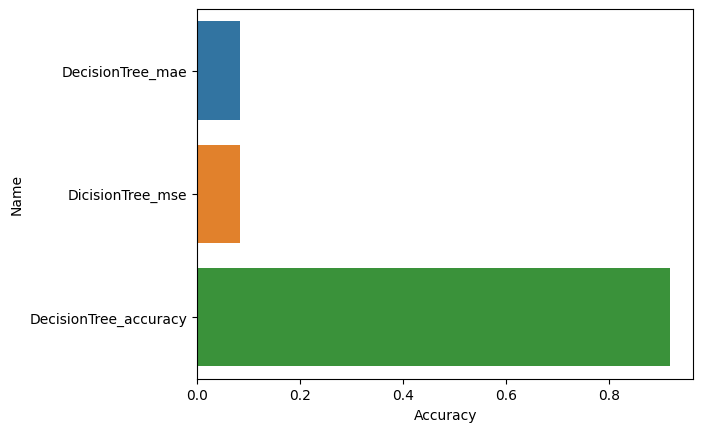

In [195]:
sns.barplot(x='Accuracy',y='Name',data=df_after_pred3)